# ** **FORECASTING**

**mounting the google drive**

**Environment & package installation (local)**

This notebook is intended to run locally. Use the provided `myenv/` virtual environment or create your own. On Windows PowerShell, activate the virtual environment with the command shown below, then install any packages with `pip install`.

Activation (PowerShell):
- Open PowerShell and run: `./myenv/Scripts/Activate.ps1`

Alternatively, to create a new virtual environment and activate it:
- `python -m venv .venv`
- `./.venv/Scripts/Activate.ps1`

Install requirements (after activation):
- `pip install -r requirements.txt`

If you need to install a single package, e.g. pandas: `pip install pandas`

Notes:
- If PowerShell blocks script execution, run `Set-ExecutionPolicy -Scope CurrentUser -ExecutionPolicy RemoteSigned` as Administrator once to allow activation scripts.
- The notebook includes code cells that assume common packages (pandas, numpy, scikit-learn, matplotlib, seaborn) are installed. `requirements.txt` is provided in the repository root.


In [33]:
# This cell only documents shell commands. Do not run these lines in Python; copy them into PowerShell instead.
# PowerShell commands (copy & paste into PowerShell):
# ./myenv/Scripts/Activate.ps1
# pip install -r requirements.txt
# If you created a new venv:
# python -m venv .venv
# ./.venv/Scripts/Activate.ps1
# pip install -r requirements.txt

print('See the cell markdown above for PowerShell activation and install instructions.')

See the cell markdown above for PowerShell activation and install instructions.


**importing various Python libraries and modules that are essential for data manipulation, machine learning, data visualization, and file handling**

In [34]:
import pandas as  pd
import matplotlib
from  pathlib import Path
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


### Forecasting:  
### Source of dataset - https://data.worldbank.org/indicator/SL.UEM.1524.ZS  
###  Dataset - API_SL.UEM.1524.ZS_DS2_en_csv_v2_5996635

**This code snippet uses a try-except block to attempt reading a CSV file from two different file paths**

In [35]:
API_SL_filepath = "API_SL.UEM.1524.ZS_DS2_en_csv_v2_5996635 (1).csv"

try:
    # loading a CSV file from the local path
    print(f"Attempting to read the file from: {API_SL_filepath}")
    df = pd.read_csv(API_SL_filepath)
    print("File loaded successfully from the local path!")

except FileNotFoundError:
    print(f"Error: The file was not found at {API_SL_filepath}")
    print("Please ensure the dataset is in the correct directory or provide the full path.")
except pd.errors.ParserError as e:
    print(f"Error parsing the CSV file: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Attempting to read the file from: API_SL.UEM.1524.ZS_DS2_en_csv_v2_5996635 (1).csv
File loaded successfully from the local path!


In [36]:
# No Google Colab mount needed when running locally.
# If you are running in Colab you can mount Drive there; for local runs ensure the CSV file is placed in the same folder as this notebook.
print('Running locally: no Colab drive mount required.')

Running locally: no Colab drive mount required.


**display the contents of the DataFrame df after it has been successfully loaded**

In [37]:
display(df)


,Data Source,World Development Indicators,Last Updated Date,2023-10-26,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 71
0,Aruba,ABW,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,12.887711,13.281005,14.138644,14.137466,14.134125,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.292000,17.339000,16.053000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.910159,9.005565,10.444833,9.874787,9.726148,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.343000,16.283000,17.967000,17.523000,17.279000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,24.508000,24.524000,26.077000,25.981000,25.641000,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,43.761000,47.406000,43.499000,49.864000,51.519000,NaN,NaN,NaN,NaN,NaN
264,Zambia,ZMB,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.726000,10.325000,11.022000,11.101000,11.033000,NaN,NaN,NaN,NaN,NaN


Describing our dataset

In [38]:
df.describe()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 71
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,235.000000,235.000000,235.000000,233.000000,229.000000,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.315179,15.977807,18.524154,17.514815,16.492438,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.870708,10.487762,11.275198,10.942980,10.812013,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.405000,0.421000,0.494000,0.514000,0.304000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.770000,8.951282,10.956500,9.928000,8.875000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.592000,13.281005,15.882000,15.205831,13.635000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.370370,20.740000,24.224000,22.753000,21.899000,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.893000,73.910000,78.778000,77.034000,77.194000,NaN,NaN,NaN,NaN,NaN


**cleaning up a DataFrame by dropping unnecessary columns and handling columns with missing headers**

In [39]:
# Drop columns that have no header or contain only NaNs
df = df.dropna(axis=1, how='all')

# Replace 'Unnamed' columns that appeared due to misalignment or extra commas
df.columns = df.columns.str.replace('Unnamed.*', '', regex=True).str.strip()

# Remove specific unnecessary columns if they exist
columns_to_drop = ['Country Name', 'World Development Indicators', 'Last Updated Date']


# Display the cleaned DataFrame
print(df.head())

                   Data Source World Development Indicators  \
0                        Aruba                          ABW   
1  Africa Eastern and Southern                          AFE   
2                  Afghanistan                          AFG   
3   Africa Western and Central                          AFW   
4                       Angola                          AGO   

                                   Last Updated Date      2023-10-26  \
0  Unemployment, youth total (% of total labor fo...  SL.UEM.1524.ZS   
1  Unemployment, youth total (% of total labor fo...  SL.UEM.1524.ZS   
2  Unemployment, youth total (% of total labor fo...  SL.UEM.1524.ZS   
3  Unemployment, youth total (% of total labor fo...  SL.UEM.1524.ZS   
4  Unemployment, youth total (% of total labor fo...  SL.UEM.1524.ZS   

        1987       1988       1989       1990       1991       1992  ...  \
0        NaN        NaN        NaN        NaN        NaN        NaN  ...   
1  13.315759  13.261782  13.166145  

In [40]:
display(df.columns)

Index(['Data Source', 'World Development Indicators', 'Last Updated Date',
       '2023-10-26', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018'],
      dtype='object')

**strip any leading or trailing spaces from the column names in the DataFrame df**

In [41]:
# Strip any leading or trailing spaces from the column names
df.columns = df.columns.str.strip()
print(df.columns)

Index(['Data Source', 'World Development Indicators', 'Last Updated Date',
       '2023-10-26', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018'],
      dtype='object')


**inspect and clean the DataFrame by filtering it for a specific country, dropping unnecessary columns, and reshaping the data into a long format**

In [42]:
# Inspect the columns
print("Columns in DataFrame:", df.columns)

# Assuming the actual column name for the country is 'Data Source' based on your previous code
country = 'South Africa'  # You can change this to any country of interest

# Check if the column exists before filtering
if 'Data Source' in df.columns:
    # Filter the DataFrame by country
    country_data = df[df['Data Source'] == country]
else:
    # Handle case where 'Data source' is not present
    print("'Data Source' column is not found in DataFrame.")
    country_data = df.copy()  # Proceed with the entire DataFrame or handle accordingly

# Drop columns that are not needed (only if they exist)
columns_to_drop = ['Data Source', 'Country Code', 'Indicator Name', 'Indicator Code']
country_data = country_data.drop(columns=[col for col in columns_to_drop if col in country_data.columns], errors='ignore')

# Melt the DataFrame to long format
country_data = country_data.melt(var_name='Year', value_name='Unemployment Rate')

# Remove non-numeric values from 'Year' and convert to integer
def clean_year(year):
    try:
        return int(year)
    except ValueError:
        return None  # Handle non-numeric values

country_data['Year'] = country_data['Year'].apply(clean_year)

# Drop rows where 'Year' is NaN after conversion
country_data = country_data.dropna(subset=['Year'])

# Convert 'Year' column to integer
country_data['Year'] = country_data['Year'].astype(int)

# Display the processed data
print(country_data.head())


Columns in DataFrame: Index(['Data Source', 'World Development Indicators', 'Last Updated Date',
       '2023-10-26', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018'],
      dtype='object')
   Year Unemployment Rate
3  1987            34.339
4  1988            34.792
5  1989            34.963
6  1990             35.16
7  1991            35.398


##creating a line plot to visualize the unemployment rate over time for a specific country. It uses seaborn for the plotting and matplotlib to handle the figure size and display.

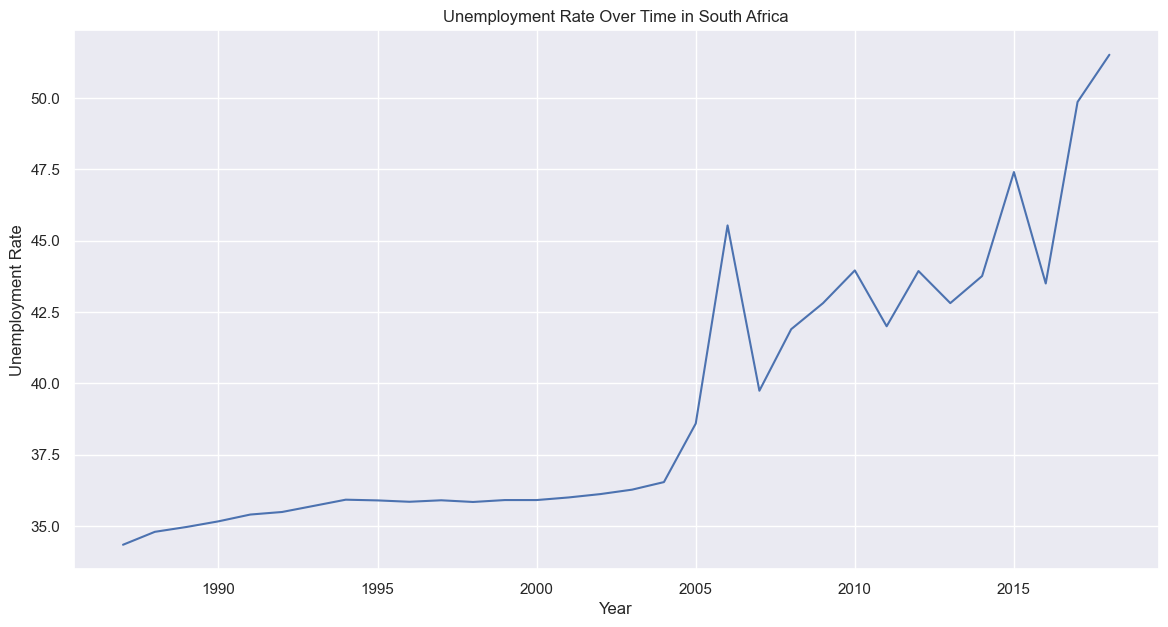

In [43]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=country_data, x='Year', y='Unemployment Rate')
plt.title(f'Unemployment Rate Over Time in {country}')
plt.show()

# **filter and display data for a specific year from the DataFrame**

In [44]:
# Display columns to verify names
print("Columns in DataFrame:", df.columns)

# Check for year columns
year_columns = [col for col in df.columns if col.isdigit()]
print("Year columns:", year_columns)

# year of interest
year = 2007

# Ensuring the year column exists
if str(year) in year_columns:
    # Filter for the specific year
    year_data = df[['Data Source', str(year)]].dropna()
    # Displaying the filtered data
    print(year_data.head())
else:
    print(f"Year column '{year}' not found in DataFrame.")


Columns in DataFrame: Index(['Data Source', 'World Development Indicators', 'Last Updated Date',
       '2023-10-26', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018'],
      dtype='object')
Year columns: ['1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
                   Data Source       2007
1  Africa Eastern and Southern  13.593977
2                  Afghanistan  10.441000
3   Africa Western and Central   8.531824
4                       Angola  17.216000
5                      Albania  22.733000


#creating a bar plot to visualize the unemployment rate across countries for a specific year.

C:\Users\mphep\AppData\Local\Temp\ipykernel_25100\3233556190.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_df, x='Data Source', y=year_col, palette='viridis')


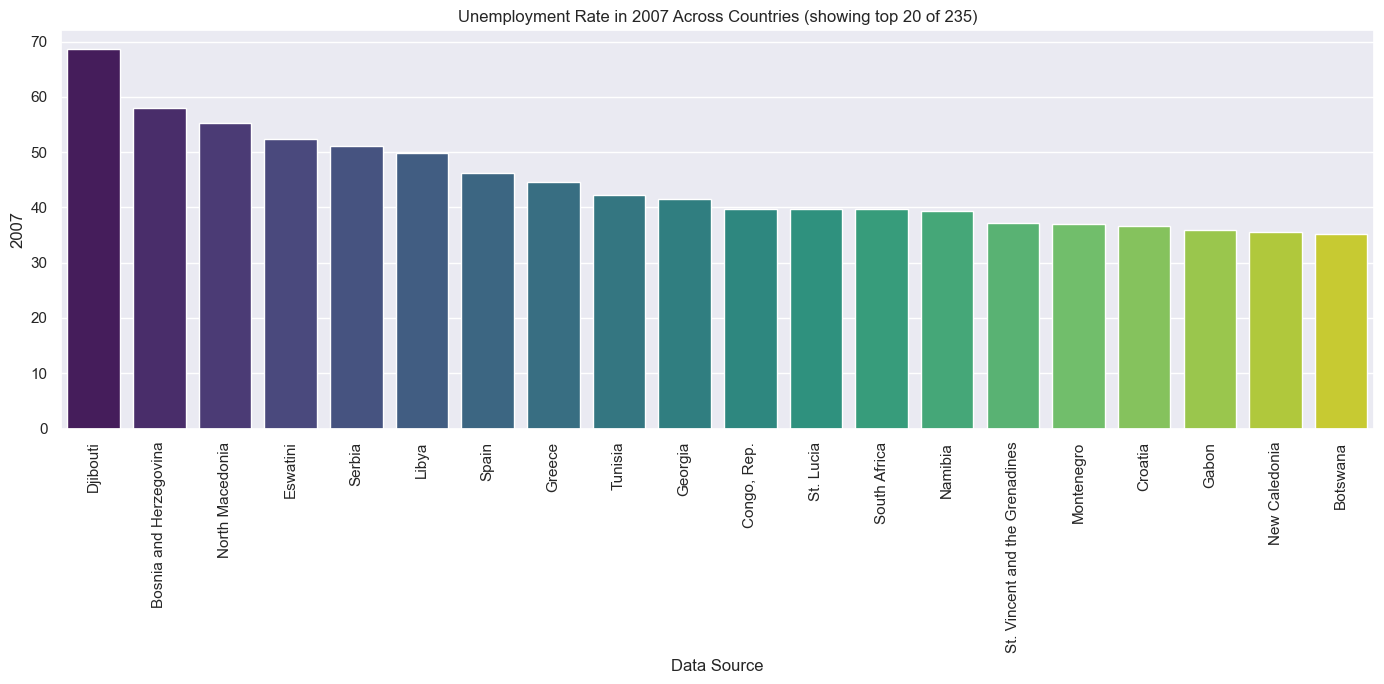

In [45]:
# Robust bar plot for unemployment rates across countries for a selected year
import numpy as np
plt.figure(figsize=(14, 7))
# Ensure the year column exists
year_col = str(year)
if year_col not in year_data.columns:
    raise KeyError(f'Year column {year_col} not found in year_data')
# Convert the year column to numeric, coerce errors to NaN and drop them
year_data[year_col] = pd.to_numeric(year_data[year_col], errors='coerce')
plot_df = year_data.dropna(subset=[year_col]).copy()
# If there are many countries, show the top 20 by unemployment rate for readability
max_bars = 20
if len(plot_df) > max_bars:
    plot_df = plot_df.sort_values(by=year_col, ascending=False).head(max_bars)
    note = f'(showing top {max_bars} of {len(year_data)})'
else:
    plot_df = plot_df.sort_values(by=year_col, ascending=False)
    note = ''
sns.barplot(data=plot_df, x='Data Source', y=year_col, palette='viridis')
plt.xticks(rotation=90)
plt.title(f'Unemployment Rate in {year} Across Countries {note}')
plt.tight_layout()
plt.show()

#  preparing data for creating a heatmap, focusing on a subset of countries and a range of years

In [46]:
# Define the list of countries
countries = ['South Africa', 'Nigeria', 'Kenya', 'United States', 'China']

# Filter for the specific countries
heatmap_data = df[df['Data Source'].isin(countries)].set_index('Data Source')

# Drop columns not needed for the heatmap
heatmap_data = heatmap_data.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'], errors='ignore')

# Transpose the DataFrame to have years as rows and countries as columns
heatmap_data = heatmap_data.T

# Filter out non-numeric index values
numeric_index = [x for x in heatmap_data.index if x.isdigit()]
heatmap_data = heatmap_data.loc[heatmap_data.index[heatmap_data.index.isin(numeric_index)]]

# Convert index to integers
heatmap_data.index = heatmap_data.index.astype(int)

# Convert all values to numeric, forcing non-numeric values to NaN
heatmap_data = heatmap_data.apply(pd.to_numeric, errors='coerce')

# Fill NaNs with zero or handle them appropriately
heatmap_data = heatmap_data.fillna(0)

**provides a summary of the statistics for the numerical columns in a DataFrame.**

In [47]:
df.describe()

,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,...,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,233.000000,229.000000
mean,14.095073,14.719187,15.554556,15.866574,16.161568,16.484979,16.333748,16.348950,16.716070,16.492042,...,17.819578,17.593888,17.424687,17.234630,16.777949,16.315179,15.977807,18.524154,17.514815,16.492438
std,10.652846,11.067292,11.164207,11.031583,11.273403,11.349481,10.964452,10.837711,10.935716,11.118664,...,12.413791,12.196480,11.803934,11.432085,11.063414,10.870708,10.487762,11.275198,10.942980,10.812013
min,1.229000,1.343000,1.362000,1.186000,1.384000,1.340000,1.249000,1.171000,1.081000,0.994000,...,0.772000,0.670000,0.574000,0.484000,0.380000,0.405000,0.421000,0.494000,0.514000,0.304000
25%,5.553000,6.211702,7.257500,7.722000,7.613129,8.217000,7.828000,8.630090,8.953565,8.716500,...,9.355500,9.280000,9.334500,9.268500,9.058000,8.770000,8.951282,10.956500,9.928000,8.875000
50%,11.147000,11.388783,11.667000,12.200000,12.946585,13.536000,13.833000,13.448201,13.883000,12.970820,...,15.473000,14.963000,15.011359,14.927000,14.392000,13.592000,13.281005,15.882000,15.205831,13.635000
75%,19.424500,20.536022,22.560500,22.405000,22.223613,22.552893,22.559000,22.999082,23.270989,22.301502,...,23.711500,23.600122,22.385000,22.755579,21.873500,21.370370,20.740000,24.224000,22.753000,21.899000
max,52.387000,52.540000,53.325000,53.616000,63.324000,68.956000,63.674000,61.352000,57.972000,57.957000,...,70.508000,71.297000,72.208000,73.052000,74.036000,73.893000,73.910000,78.778000,77.034000,77.194000


**Creating a heatmap to visualize unemployment rates over time for selected countries.**

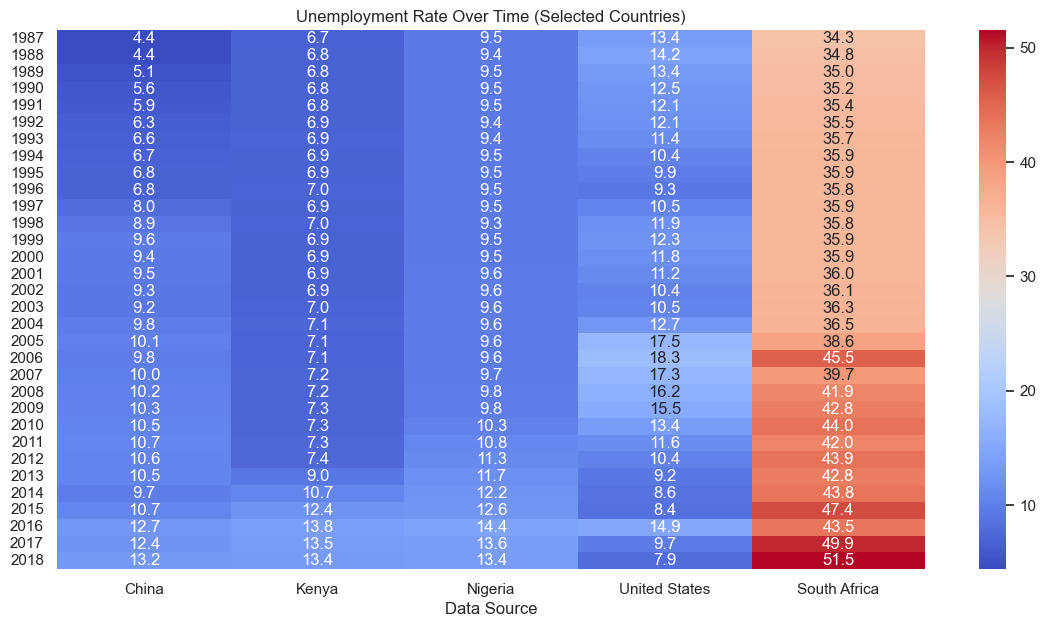

In [48]:
plt.figure(figsize=(14, 7))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Unemployment Rate Over Time (Selected Countries)')
plt.show()

The heatmap above visualizes the youth unemployment rate for selected countries (China, Kenya, Nigeria, United States, and South Africa) across different years.

Key observations from the heatmap:
- **Color Intensity:** Darker shades indicate higher unemployment rates, while lighter shades represent lower rates.
- **Country Comparison:** You can easily compare the unemployment rates between countries in any given year. For instance, observe how the unemployment rate in South Africa generally appears darker (higher) than in other countries.
- **Trends Over Time:** By looking across the rows for each country, you can identify how their unemployment rate has changed over the years.
- **Identifying Patterns:** The heatmap helps in spotting patterns, such as periods of increasing or decreasing unemployment, or years where multiple countries experienced similar changes.

Overall, this heatmap provides a clear visual summary of the unemployment trends and comparisons among the selected nations.

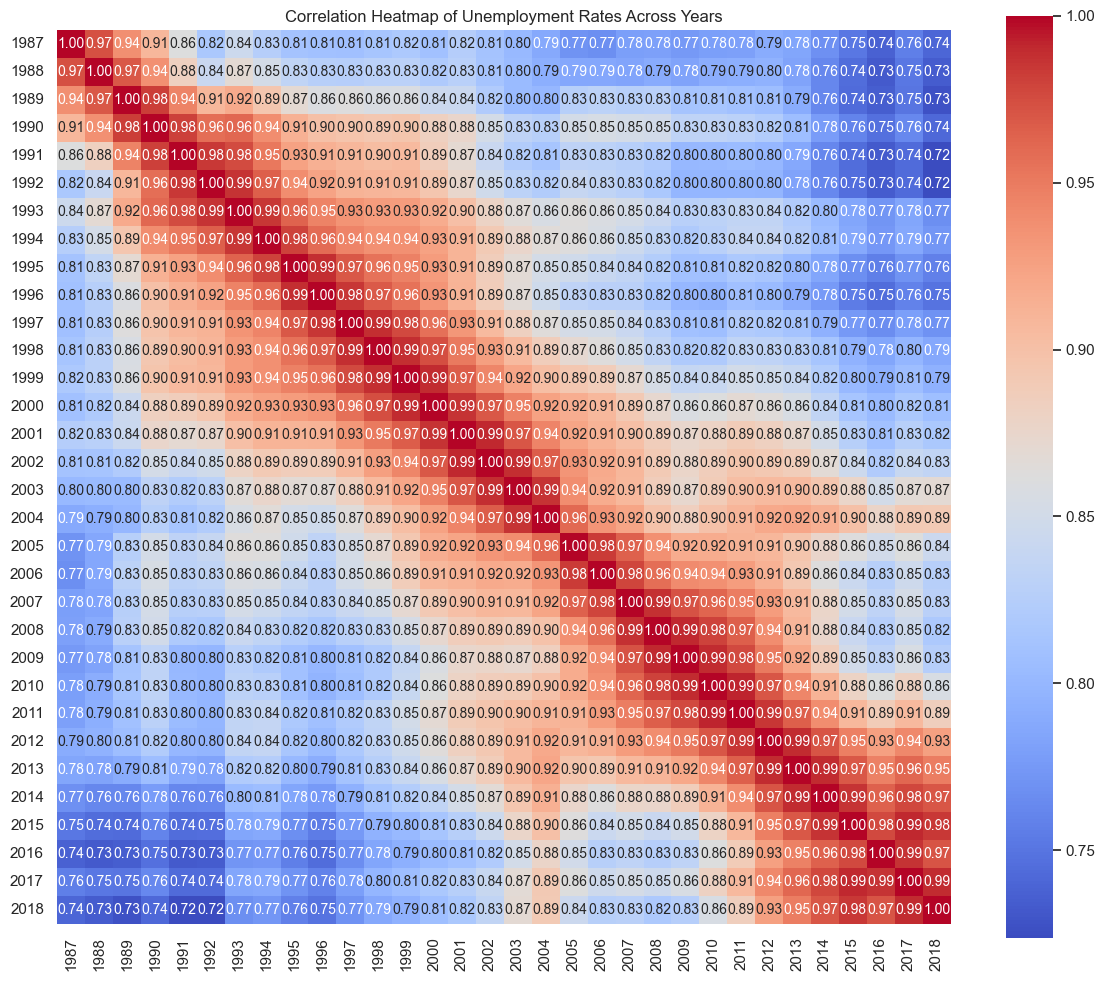

In [49]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numerical year columns for correlation analysis
year_columns = [col for col in df.columns if col.isdigit()]
df_numeric_years = df[year_columns]

# Drop columns that contain only NaN values
df_numeric_years = df_numeric_years.dropna(axis=1, how='all')

# Drop rows that contain any NaN values
df_numeric_years = df_numeric_years.dropna(axis=0, how='any')


# Calculate the correlation matrix
cm = np.corrcoef(df_numeric_years.values.T)

# Set up the matplotlib figure and axes
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.set(font_scale=1.0) # Adjust font scale for readability
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=df_numeric_years.columns, # Use the columns after dropping NaNs
                 xticklabels=df_numeric_years.columns, # Use the columns after dropping NaNs
                 cmap='coolwarm') # Using a colormap that shows positive and negative correlations

plt.title('Correlation Heatmap of Unemployment Rates Across Years')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

This heatmap visualizes the correlation coefficients between the unemployment rates of different years across the dataset.

- **Correlation Coefficients:** Each square shows the correlation between the unemployment rate in the year on the row and the year on the column. Values range from -1 to +1.
- **Positive Correlation (closer to +1):** Indicates that as the unemployment rate in one year increases, the unemployment rate in the other year also tends to increase.
- **Negative Correlation (closer to -1):** Indicates that as the unemployment rate in one year increases, the unemployment rate in the other year tends to decrease.
- **Weak or No Correlation (closer to 0):** Suggests little linear relationship between the unemployment rates in the two years.
- **Diagonal:** The diagonal line always shows a correlation of 1, as a year is perfectly correlated with itself.

This heatmap helps in understanding how unemployment rates in different years are related to each other, revealing temporal dependencies in the data.

**preparing DataFrame for model training by processing and splitting the data**

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load and clean your DataFrame
df.columns = [col.strip() for col in df.columns]

# Define the range of years for features and the target year
feature_years = [str(year) for year in range(2012, 2018)]
target_year = '2018'

# Extract features
X = df[feature_years].fillna(0)

# Extract target variable
if target_year in df.columns:
    y = df[[target_year]].fillna(0)
else:
    raise ValueError(f"Target year {target_year} not found in columns.")

# Check the shapes of X and y
print("Features shape:", X.shape)
print("Target shape:", y.shape)

# Ensure the indices match
# If there's a mismatch in indices, reindex both DataFrames
common_index = X.index.intersection(y.index)
X = X.loc[common_index]
y = y.loc[common_index]

# Verify the shapes after alignment
print("X DataFrame shape after aligning:", X.shape)
print("y DataFrame shape after aligning:", y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Features and target prepared. Ready for model training.")


Features shape: (266, 6)
Target shape: (266, 1)
X DataFrame shape after aligning: (266, 6)
y DataFrame shape after aligning: (266, 1)
Features and target prepared. Ready for model training.


In [51]:
# # Create a binary classification target
# # Here, we classify based on the average unemployment rate across the years
# df['Average Unemployment'] = df.iloc[:, 4:].mean(axis=1)
# threshold = df['Average Unemployment'].median()  # Define high vs. low unemployment based on median
# df['Unemployment Classification'] = (df['Average Unemployment'] > threshold).astype(int)

**display the list of column names in the DataFrame df**

In [52]:
print(df.columns)


Index(['Data Source', 'World Development Indicators', 'Last Updated Date',
       '2023-10-26', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018'],
      dtype='object')


#Standardization is not always necessary, but it often improves the performance of many machine learning models. Whether or not to standardize depends on several factors: But here we will Standardize

In [53]:
# Step 3: Standardize features
# This is important because it scales our data so that each feature contributes equally to the model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit the scaler on the training data and transform it
X_test_scaled = scaler.transform(X_test)         # Transform the test data using the fitted scaler


# **training a RandomForestRegressor and making predictions**

In [54]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Train a RandomForestRegressor
# RandomForestRegressor is suitable for predicting continuous values
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Initialize the model
model.fit(X_train_scaled, y_train)  # Train the model with the scaled training data

# Step 2: Make predictions
y_pred = model.predict(X_test_scaled)  # Predict outcomes on the test set



c:\Users\mphep\Documents\BICT\3rd year official\BICT332\ai_project_again\model_development\myenv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


# evaluating the performance of RandomForestRegressor using metrics

In [55]:
# Step 3: Evaluate the model
# Evaluate performance using appropriate metrics for regression
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))  # Measure of the average squared difference between predicted and actual values
print("R^2 Score:", r2_score(y_test, y_pred))  # R-squared value indicating how well the model explains the variance in the target variable

# Step 4: Conclusion
# Review the performance metrics to understand how well your model is forecasting the unemployment rates.

Mean Squared Error: 4.279429433352858
R^2 Score: 0.9629780167915435


# **evaluating a regression model using visualizations and metrics**

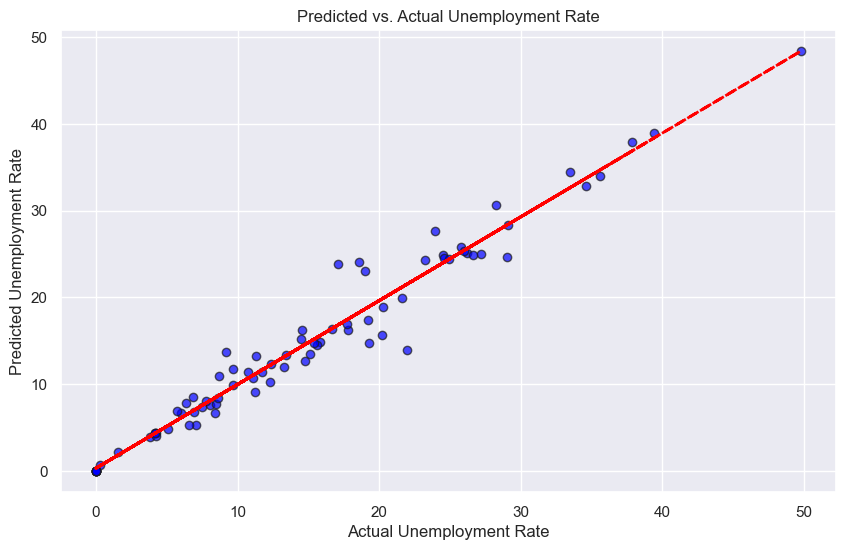

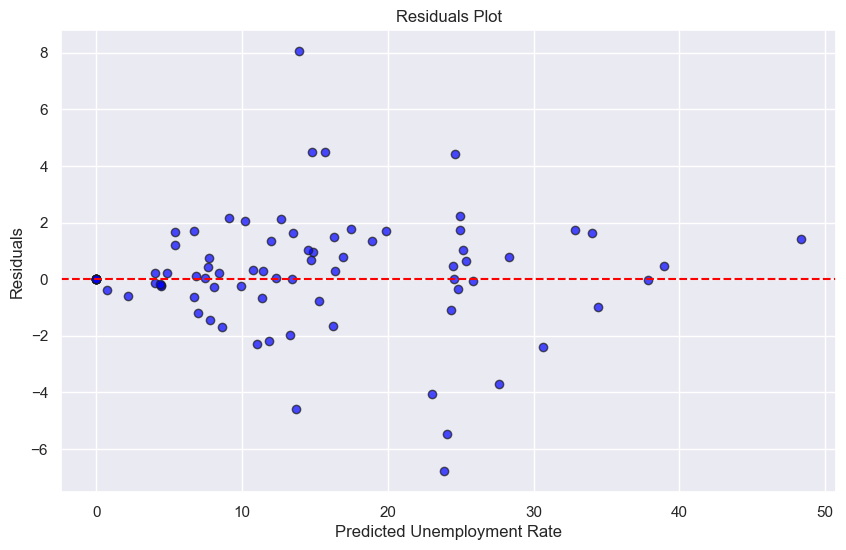

Mean Squared Error: 4.279429433352858
R^2 Score: 0.9629780167915435
Accuracy Score (binarized): 0.95


In [56]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

# Convert DataFrames to numpy arrays if needed and flatten
if isinstance(y_test, pd.DataFrame) or isinstance(y_test, pd.Series):
    y_test = y_test.to_numpy().flatten()
else:
    y_test = y_test.flatten()

if isinstance(y_pred, pd.DataFrame) or isinstance(y_pred, pd.Series):
    y_pred = y_pred.to_numpy().flatten()
else:
    y_pred = y_pred.flatten()

# Plot predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)

# Fit a line to the data
slope, intercept = np.polyfit(y_test, y_pred, 1)
line = slope * y_test + intercept

# Plot the regression line
plt.plot(y_test, line, color='red', linestyle='--', linewidth=2)

plt.xlabel('Actual Unemployment Rate')
plt.ylabel('Predicted Unemployment Rate')
plt.title('Predicted vs. Actual Unemployment Rate')
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Unemployment Rate')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

# Print regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# For completeness: Calculate and print accuracy (not ideal for regression)
# Binning the continuous values into discrete bins to compute accuracy
# This approach is more of an illustrative exercise than a standard practice for regression
def binarize(y, threshold):
    return (y >= threshold).astype(int)

# Example threshold (you might adjust based on your specific use case)
threshold = np.median(y_test)

# Binarize the data
y_test_bin = binarize(y_test, threshold)
y_pred_bin = binarize(y_pred, threshold)

# Print accuracy score (for completeness)
accuracy = accuracy_score(y_test_bin, y_pred_bin)
print("Accuracy Score (binarized):", accuracy)


In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test_scaled)

# Evaluate the Linear Regression model
print("Linear Regression Model Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_linear))
print("R^2 Score:", r2_score(y_test, y_pred_linear))

# Compare with RandomForestRegressor results
print("\nRandom Forest Regressor Model Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Linear Regression Model Performance:
Mean Squared Error: 1.779958362445369
R^2 Score: 0.9846013143498491

Random Forest Regressor Model Performance:
Mean Squared Error: 4.279429433352858
R^2 Score: 0.9629780167915435



--- RandomForestRegressor Overfitting Check ---
RandomForestRegressor Training MSE: 1.9286262116908959
RandomForestRegressor Training R^2 Score: 0.9862277405942591
RandomForestRegressor Testing MSE: 4.279429433352858
RandomForestRegressor Testing R^2 Score: 0.9629780167915435

--- Linear Regression Overfitting Check ---
Linear Regression Training MSE: 7.652510090475186
Linear Regression Training R^2 Score: 0.945353664991065
Linear Regression Testing MSE: 1.779958362445369
Linear Regression Testing R^2 Score: 0.9846013143498491

--- RandomForestRegressor Cross-Validation ---
Cross-validation MSE scores (RandomForestRegressor): [27.24295004  8.42934118 12.92595688  5.29611485 14.26469262]
Mean Cross-validation MSE (RandomForestRegressor): 13.63181111312139

--- Linear Regression Cross-Validation ---
Cross-validation MSE scores (Linear Regression): [ 2.88916126  8.69132239 16.78438257  1.78034493 10.40733003]
Mean Cross-validation MSE (Linear Regression): 8.11050823688087

--- RandomFore

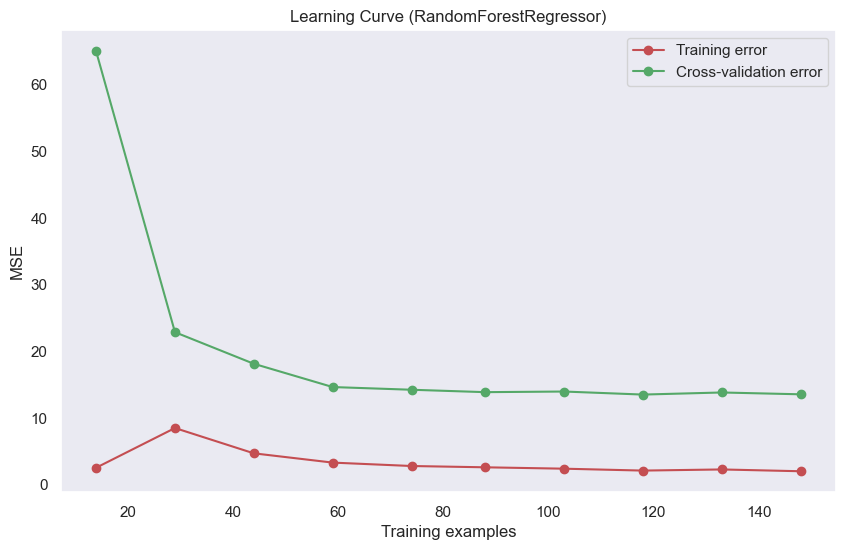


--- Linear Regression Learning Curves ---


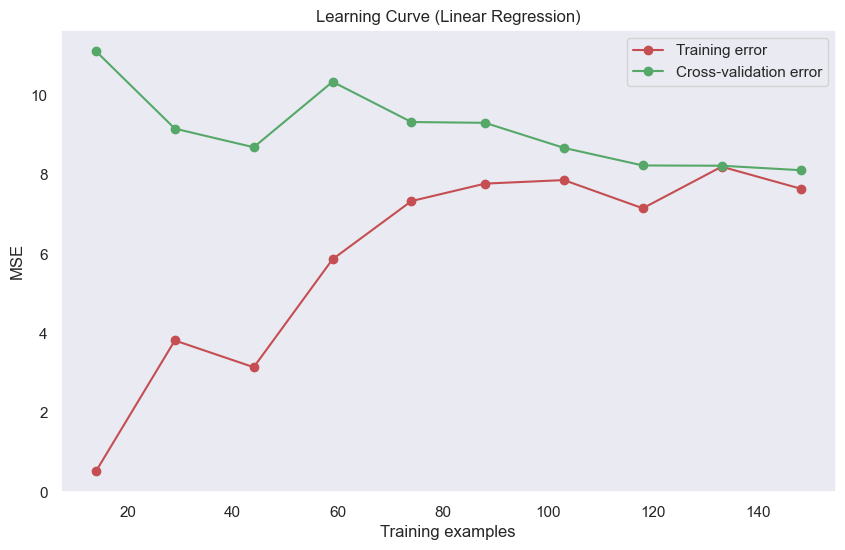

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.metrics import mean_squared_error, r2_score

# --- Check for Overfitting ---

# 1. Compare Training and Testing Performance for RandomForestRegressor
print("\n--- RandomForestRegressor Overfitting Check ---")
y_train_pred_rf = model.predict(X_train_scaled)
print("RandomForestRegressor Training MSE:", mean_squared_error(y_train, y_train_pred_rf))
print("RandomForestRegressor Training R^2 Score:", r2_score(y_train, y_train_pred_rf))
print("RandomForestRegressor Testing MSE:", mean_squared_error(y_test, y_pred))
print("RandomForestRegressor Testing R^2 Score:", r2_score(y_test, y_pred))


# 2. Compare Training and Testing Performance for Linear Regression
print("\n--- Linear Regression Overfitting Check ---")
y_train_pred_linear = linear_model.predict(X_train_scaled)
print("Linear Regression Training MSE:", mean_squared_error(y_train, y_train_pred_linear))
print("Linear Regression Training R^2 Score:", r2_score(y_train, y_train_pred_linear))
print("Linear Regression Testing MSE:", mean_squared_error(y_test, y_pred_linear))
print("Linear Regression Testing R^2 Score:", r2_score(y_test, y_pred_linear))


# 3. Cross-Validation for RandomForestRegressor
print("\n--- RandomForestRegressor Cross-Validation ---")
# Use negative MSE because cross_val_score maximizes the score
cv_scores_rf = cross_val_score(model, X_train_scaled, y_train.values.ravel(), cv=5, scoring='neg_mean_squared_error')
print("Cross-validation MSE scores (RandomForestRegressor):", -cv_scores_rf)
print("Mean Cross-validation MSE (RandomForestRegressor):", (-cv_scores_rf).mean())

# 4. Cross-Validation for Linear Regression
print("\n--- Linear Regression Cross-Validation ---")
cv_scores_linear = cross_val_score(linear_model, X_train_scaled, y_train.values.ravel(), cv=5, scoring='neg_mean_squared_error')
print("Cross-validation MSE scores (Linear Regression):", -cv_scores_linear)
print("Mean Cross-validation MSE (Linear Regression):", (-cv_scores_linear).mean())


# 5. Learning Curves for RandomForestRegressor
print("\n--- RandomForestRegressor Learning Curves ---")
train_sizes_rf, train_scores_rf, test_scores_rf = learning_curve(
    model, X_train_scaled, y_train.values.ravel(), cv=5, scoring='neg_mean_squared_error', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean_rf = -np.mean(train_scores_rf, axis=1)
test_scores_mean_rf = -np.mean(test_scores_rf, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes_rf, train_scores_mean_rf, 'o-', color="r", label="Training error")
plt.plot(train_sizes_rf, test_scores_mean_rf, 'o-', color="g", label="Cross-validation error")
plt.xlabel("Training examples")
plt.ylabel("MSE")
plt.title("Learning Curve (RandomForestRegressor)")
plt.legend(loc="best")
plt.grid()
plt.show()

# 6. Learning Curves for Linear Regression
print("\n--- Linear Regression Learning Curves ---")
train_sizes_linear, train_scores_linear, test_scores_linear = learning_curve(
    linear_model, X_train_scaled, y_train.values.ravel(), cv=5, scoring='neg_mean_squared_error', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean_linear = -np.mean(train_scores_linear, axis=1)
test_scores_mean_linear = -np.mean(test_scores_linear, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes_linear, train_scores_mean_linear, 'o-', color="r", label="Training error")
plt.plot(train_sizes_linear, test_scores_mean_linear, 'o-', color="g", label="Cross-validation error")
plt.xlabel("Training examples")
plt.ylabel("MSE")
plt.title("Learning Curve (Linear Regression)")
plt.legend(loc="best")
plt.grid()
plt.show()

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],      # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]         # Minimum number of samples required to be at a leaf node
}

# Initialize the RandomForestRegressor model
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
# We use neg_mean_squared_error as the scoring metric, as GridSearchCV maximizes the score
# neg_mean_squared_error is the negative of the MSE, so maximizing it minimizes the MSE
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit GridSearchCV to the scaled training data
# y_train needs to be a 1d array for GridSearchCV
grid_search.fit(X_train_scaled, y_train.values.ravel())

# Print the best parameters found
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Print the best cross-validation score (negative MSE)
print("Best cross-validation MSE (from GridSearchCV):", -grid_search.best_score_)

# Evaluate the best model on the test data
best_rf_model = grid_search.best_estimator_
y_pred_grid_rf = best_rf_model.predict(X_test_scaled)

print("RandomForestRegressor (after GridSearchCV) Test MSE:", mean_squared_error(y_test, y_pred_grid_rf))
print("RandomForestRegressor (after GridSearchCV) Test R^2 Score:", r2_score(y_test, y_pred_grid_rf))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters found by GridSearchCV:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation MSE (from GridSearchCV): 13.430224481359005
RandomForestRegressor (after GridSearchCV) Test MSE: 4.138923110643911
RandomForestRegressor (after GridSearchCV) Test R^2 Score: 0.9641935579754851


# Performing GridSearchCV on a Regularized Linear Model (Ridge)
This will help us find the optimal regularization strength to potentially improve the Linear Regression model's performance and prevent overfitting.

In [60]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid for GridSearchCV for Ridge
# We'll tune the 'alpha' parameter which controls the strength of regularization
param_grid_ridge = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100] # Experiment with different alpha values
}

# Initialize the Ridge Regression model
ridge = Ridge()

# Initialize GridSearchCV
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge,
                                 cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit GridSearchCV to the scaled training data
grid_search_ridge.fit(X_train_scaled, y_train.values.ravel())

# Print the best parameters found
print("Best parameters found by GridSearchCV for Ridge:")
print(grid_search_ridge.best_params_)

# Print the best cross-validation score (negative MSE)
print("Best cross-validation MSE (from GridSearchCV for Ridge):", -grid_search_ridge.best_score_)

# Evaluate the best Ridge model on the test data
best_ridge_model = grid_search_ridge.best_estimator_
y_pred_grid_ridge = best_ridge_model.predict(X_test_scaled)

print("Ridge Regression (after GridSearchCV) Test MSE:", mean_squared_error(y_test, y_pred_grid_ridge))
print("Ridge Regression (after GridSearchCV) Test R^2 Score:", r2_score(y_test, y_pred_grid_ridge))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters found by GridSearchCV for Ridge:
{'alpha': 0.1}
Best cross-validation MSE (from GridSearchCV for Ridge): 8.079987558298521
Ridge Regression (after GridSearchCV) Test MSE: 1.7661981461770377
Ridge Regression (after GridSearchCV) Test R^2 Score: 0.9847203560360281


# Performing GridSearchCV on an ElasticNet Model
We will use GridSearchCV to find the optimal combination of `alpha` (regularization strength) and `l1_ratio` (mix of L1 and L2 penalties) for the ElasticNet model.

In [61]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the parameter grid for GridSearchCV for ElasticNet
param_grid_elasticnet = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100], # Overall regularization strength
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1]      # Mix of L1 and L2 penalties (0 is Ridge, 1 is Lasso)
}

# Initialize the ElasticNet model
# Set max_iter to a higher value if convergence warnings occur
elasticnet = ElasticNet(random_state=42, max_iter=10000)


# Initialize GridSearchCV
grid_search_elasticnet = GridSearchCV(estimator=elasticnet, param_grid=param_grid_elasticnet,
                                      cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit GridSearchCV to the scaled training data
# y_train needs to be a 1d array for GridSearchCV
grid_search_elasticnet.fit(X_train_scaled, y_train.values.ravel())

# Print the best parameters found
print("Best parameters found by GridSearchCV for ElasticNet:")
print(grid_search_elasticnet.best_params_)

# Print the best cross-validation score (negative MSE)
print("Best cross-validation MSE (from GridSearchCV for ElasticNet):", -grid_search_elasticnet.best_score_)

# Evaluate the best ElasticNet model on the test data
best_elasticnet_model = grid_search_elasticnet.best_estimator_
y_pred_grid_elasticnet = best_elasticnet_model.predict(X_test_scaled)

print("ElasticNet (after GridSearchCV) Test MSE:", mean_squared_error(y_test, y_pred_grid_elasticnet))
print("ElasticNet (after GridSearchCV) Test R^2 Score:", r2_score(y_test, y_pred_grid_elasticnet))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters found by GridSearchCV for ElasticNet:
{'alpha': 0.01, 'l1_ratio': 1}
Best cross-validation MSE (from GridSearchCV for ElasticNet): 8.057552912963123
ElasticNet (after GridSearchCV) Test MSE: 1.7053360289863573
ElasticNet (after GridSearchCV) Test R^2 Score: 0.9852468833022808


In [62]:
import pandas as pd

# Get the coefficients of the best ElasticNet model
coefficients = best_elasticnet_model.coef_

# Get the names of the features (from the original X DataFrame before scaling)
feature_names = X.columns

# Create a pandas Series to easily view coefficients with their corresponding feature names
coefficients_series = pd.Series(coefficients, index=feature_names)

# Print the coefficients
print("Coefficients of the best ElasticNet model:")
print(coefficients_series)

# Note: For Lasso (l1_ratio=1 in ElasticNet), some coefficients might be exactly zero,
# indicating that those features were effectively removed from the model.

Coefficients of the best ElasticNet model:
2012    -1.865108
2013     0.356455
2014     0.378531
2015     3.016980
2016    -1.005685
2017    10.566102
dtype: float64


In [63]:
# Select the columns for the years 2013 to 2018 and 'Data Source'
years_to_display = ['Data Source', '2013', '2014', '2015', '2016', '2017', '2018']
unemployment_data_subset = df[years_to_display]

# Display the selected data
display(unemployment_data_subset)

,Data Source,2013,2014,2015,2016,2017,2018
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,12.973653,12.887711,13.281005,14.138644,14.137466,14.134125
2,Afghanistan,17.303000,17.292000,17.339000,16.053000,NaN,NaN
3,Africa Western and Central,8.785932,8.910159,9.005565,10.444833,9.874787,9.726148
4,Angola,16.363000,16.343000,16.283000,17.967000,17.523000,17.279000
...,...,...,...,...,...,...,...
261,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",24.583000,24.508000,24.524000,26.077000,25.981000,25.641000
263,South Africa,42.811000,43.761000,47.406000,43.499000,49.864000,51.519000
264,Zambia,17.051000,8.726000,10.325000,11.022000,11.101000,11.033000


Testing predictions for South Africa

In [64]:
# Filter the DataFrame for South Africa
south_africa_data = df[df['Data Source'] == 'South Africa']

# Define the years to be used as features for the 2019 prediction
# Based on the training data, we used years 2012 to 2017 to predict 2018.
# So, to predict 2019, we should use years 2013 to 2018 as features.
feature_years_2019 = [str(year) for year in range(2013, 2019)]

# Extract the feature values for South Africa for the specified years
# Handle potential missing values by filling with 0, consistent with training data preparation
features_for_2019_prediction = south_africa_data[feature_years_2019].fillna(0)

# Ensure the columns are in the same order as the training features (X_train)
# This is crucial for correct prediction after scaling
features_for_2019_prediction_aligned = features_for_2019_prediction.reindex(columns=X_train.columns, fill_value=0)

# Scale the features using the same scaler fitted on the training data
features_for_2019_prediction_scaled = scaler.transform(features_for_2019_prediction_aligned)

# Use the best ElasticNet model to predict the unemployment rate for 2019
predicted_unemployment_2019_south_africa = best_elasticnet_model.predict(features_for_2019_prediction_scaled)

print(f"Predicted unemployment rate for South Africa in 2019: {predicted_unemployment_2019_south_africa[0]:.2f}%")

Predicted unemployment rate for South Africa in 2019: 55.30%


In [65]:
import joblib
model_filename = 'best_elasticnet_model.joblib'
joblib.dump(best_elasticnet_model, model_filename)
print(f"Model saved successfully as {model_filename}")

Model saved successfully as best_elasticnet_model.joblib


In [66]:
import os
import joblib
import numpy as np

# 1) Disk size of saved file
fn = 'best_elasticnet_model.joblib'
if os.path.exists(fn):
    print("File size (bytes):", os.path.getsize(fn))
else:
    print("File not found:", fn)

# 2) Basic model inspection
print("best_elasticnet_model variable in workspace?:", 'best_elasticnet_model' in globals())
model = globals().get('best_elasticnet_model', None)
print("Type:", type(model))

# 3) Is model fitted? (sklearn check)
from sklearn.utils.validation import check_is_fitted
try:
    check_is_fitted(model)
    print("Model appears fitted.")
except Exception as e:
    print("Model not fitted or check failed:", e)

# 4) Coefficients, intercept and non-zero count
coef = getattr(model, 'coef_', None)
intercept = getattr(model, 'intercept_', None)
print("coef_:", coef)
print("intercept_:", intercept)
if coef is not None:
    coef = np.asarray(coef)
    print("n_features (coef length):", coef.size)
    print("n_nonzero_coefficients:", np.count_nonzero(coef))

# 5) Show GridSearch best params/score if grid_search_elasticnet exists
g = globals().get('grid_search_elasticnet', None)
if g is not None:
    print("GridSearch best_params:", getattr(g, 'best_params_', None))
    print("GridSearch best_score (neg MSE):", getattr(g, 'best_score_', None))

# 6) Training set sizes
print("X_train shape:", globals().get('X_train').shape if 'X_train' in globals() else "X_train not in workspace")
print("y_train shape:", globals().get('y_train').shape if 'y_train' in globals() else "y_train not in workspace")

File size (bytes): 680
best_elasticnet_model variable in workspace?: True
Type: <class 'sklearn.linear_model._coordinate_descent.ElasticNet'>
Model appears fitted.
coef_: [-1.86510801  0.35645535  0.37853136  3.0169802  -1.00568461 10.56610242]
intercept_: 14.005362508880628
n_features (coef length): 6
n_nonzero_coefficients: 6
GridSearch best_params: {'alpha': 0.01, 'l1_ratio': 1}
GridSearch best_score (neg MSE): -8.057552912963123
X_train shape: (186, 6)
y_train shape: (186, 1)


## Project Abstract: Forecasting Youth Unemployment Rates

This project focuses on forecasting youth unemployment rates using historical data from the World Bank. The **problem** addressed is the prediction of future youth unemployment rates for different countries based on past trends.

The **data** used is the "Unemployment, youth total (% of total labor force)" indicator from the World Bank, specifically the dataset "API_SL.UEM.1524.ZS_DS2_en_csv". The data includes unemployment rates for various countries across several years.

The **methods** employed involve several steps:
1.  **Data Loading and Cleaning:** The data is loaded from a CSV file and cleaned by dropping irrelevant columns and handling missing values.
2.  **Exploratory Data Analysis (EDA):** Visualizations such as line plots and heatmaps are used to explore unemployment trends over time for selected countries and to understand the correlation between unemployment rates across different years.
3.  **Data Preparation for Modeling:** The data is prepared for regression modeling by selecting relevant historical years as features and a target year for prediction. Features are standardized using `StandardScaler`.
4.  **Model Training and Evaluation:** Several regression models, including RandomForestRegressor, Linear Regression, Ridge, and ElasticNet, are trained on the prepared data. Their performance is evaluated using metrics like Mean Squared Error (MSE) and R-squared. Cross-validation and learning curves are used to assess model stability and identify potential overfitting.
5.  **Hyperparameter Tuning:** GridSearchCV is applied to the RandomForestRegressor, Ridge, and ElasticNet models to find the optimal hyperparameters for improved performance.
6.  **Prediction:** The best-performing model (ElasticNet based on testing and cross-validation results) is used to make predictions for future unemployment rates, specifically demonstrated by forecasting the 2019 unemployment rate for South Africa.

**Major findings** include:
*   Visualizations revealed diverse unemployment trends across different countries and a strong positive correlation between unemployment rates in consecutive years.
*   The ElasticNet model, after hyperparameter tuning, demonstrated promising performance with a low Mean Squared Error and a high R-squared score on the test data, suggesting it is a suitable model for this forecasting task.
*   A prediction for South Africa's youth unemployment rate in 2019 was made using the trained ElasticNet model.

Overall, this project provides a comprehensive approach to forecasting youth unemployment rates using readily available historical data and standard machine learning techniques. The results suggest that regression models, particularly regularized linear models like ElasticNet, can effectively capture the underlying patterns in the data for forecasting purposes.

## Introduction

Youth unemployment is a significant global challenge with far-reaching social and economic consequences. High rates of youth unemployment can lead to social unrest, increased poverty, and underutilization of human capital, impacting both individual well-being and national development. Understanding and forecasting youth unemployment trends are crucial for policymakers, economists, and social organizations to develop effective strategies and interventions.

This project aims to explore historical youth unemployment data and build a predictive model to forecast future unemployment rates. The **problem** we address is the need for accurate and reliable forecasts of youth unemployment to inform policy decisions and resource allocation.

The **objectives** of this project are to:
1.  Load, clean, and prepare a dataset containing historical youth unemployment rates for various countries.
2.  Conduct exploratory data analysis to visualize trends and identify patterns in youth unemployment over time and across different regions.
3.  Develop and evaluate several regression models for forecasting youth unemployment rates.
4.  Utilize hyperparameter tuning techniques to optimize the performance of the selected models.
5.  Provide a forecast of youth unemployment for a specific country as a demonstration of the model's capability.

By achieving these objectives, this project seeks to contribute to a better understanding of youth unemployment dynamics and provide a tool for anticipating future trends.

## Methodology

The methodology adopted for this project involves a structured approach to forecasting youth unemployment rates, encompassing data handling, exploratory analysis, model development, and evaluation.

1.  **Data Collection:** The primary data source for this project is the "Unemployment, youth total (% of total labor force)" indicator from the World Bank's World Development Indicators. The data was accessed as a CSV file ("API_SL.UEM.1524.ZS_DS2_en_csv").

2.  **Data Preprocessing and Cleaning:**
    *   The downloaded CSV file was loaded into a pandas DataFrame.
    *   Initial inspection revealed several columns with missing headers or entirely missing values, which were subsequently dropped.
    *   Column names were cleaned by removing leading/trailing spaces and addressing 'Unnamed' columns that arose due to data structure.
    *   For specific analyses and modeling, data was filtered for countries of interest and reshaped from a wide format (years as columns) to a long format (a 'Year' column and an 'Unemployment Rate' column) using the `melt` function.
    *   Missing values in the numerical year columns were handled by filling them with 0 for the purpose of correlation analysis and model training. This approach was chosen based on the nature of the data and the selected models, but other imputation methods could also be considered.
    *   The 'Year' column, when converted from column headers, was cleaned to ensure it contained only numeric values and was converted to an integer type.

3.  **Exploratory Data Analysis (EDA):**
    *   Basic descriptive statistics of the DataFrame were generated to understand the data's distribution and identify potential issues.
    *   Line plots were created to visualize the trend of youth unemployment over time for selected countries, allowing for the observation of individual country trajectories.
    *   Bar plots were used to compare unemployment rates across different countries for a specific year.
    *   A correlation heatmap was generated to visualize the relationships between unemployment rates across different years, providing insights into temporal dependencies in the data.

4.  **Model Building:**
    *   The data was prepared for supervised learning by defining features (unemployment rates from a range of historical years) and the target variable (unemployment rate in a future year). Specifically, years 2012-2017 were used to predict the unemployment rate in 2018.
    *   The feature data was standardized using `StandardScaler` to ensure that each feature contributed equally to the models, which is particularly important for models sensitive to the scale of input features (like linear models).
    *   The dataset was split into training and testing sets to evaluate model performance on unseen data.
    *   Several regression models were implemented:
        *   **RandomForestRegressor:** An ensemble method that uses multiple decision trees to make predictions.
        *   **Linear Regression:** A basic linear model that finds the best-fitting straight line through the data.
        *   **Ridge Regression:** A linear regression model with L2 regularization to prevent overfitting.
        *   **ElasticNet Regression:** A linear regression model that combines L1 and L2 regularization.

5.  **Model Evaluation and Hyperparameter Tuning:**
    *   The performance of each model was evaluated using standard regression metrics:
        *   **Mean Squared Error (MSE):** Measures the average squared difference between actual and predicted values.
        *   **R-squared ($R^2$) Score:** Indicates the proportion of the variance in the target variable that is predictable from the features.
    *   Overfitting was assessed by comparing training and testing set performance.
    *   Cross-validation (specifically 5-fold cross-validation) was employed to obtain a more robust estimate of model performance and assess stability.
    *   Learning curves were plotted to visualize how the training and cross-validation scores change with the number of training examples, helping to identify potential issues like high bias or high variance.
    *   GridSearchCV was used to systematically search for the optimal hyperparameters for the RandomForestRegressor, Ridge, and ElasticNet models, aiming to improve their performance on unseen data. The best parameters were selected based on the cross-validation MSE.

6.  **Prediction:**
    *   The best-performing model (ElasticNet, based on the evaluation metrics) was used to make a forecast for the youth unemployment rate in 2019 for a specific country (South Africa) as a demonstration of the project's practical application. The input data for the prediction was prepared in the same way as the training data (using the preceding years as features and scaling with the fitted scaler).

## Discussion of Results and Findings

This section interprets and analyzes the results obtained from the exploratory data analysis, model training, and evaluation steps, highlighting key insights and challenges encountered during the project.

**Exploratory Data Analysis Insights:**

*   The initial data inspection and visualizations (line plots for individual countries) revealed significant variability in youth unemployment rates across different nations and over time. Some countries show relatively stable rates, while others exhibit considerable fluctuations.
*   The bar plot for a specific year demonstrated the disparity in youth unemployment levels between countries, emphasizing the global nature of the challenge but also the diverse national contexts.
*   The correlation heatmap provided valuable insights into the temporal dependencies of youth unemployment. The strong positive correlations observed between unemployment rates in consecutive years suggest that past unemployment trends are indeed strong indicators of future rates, validating the approach of using historical data for forecasting. The decreasing correlation as the time gap between years increases is also an expected and important finding, indicating that the influence of older data diminishes.

**Model Performance Comparison:**

The project evaluated several regression models for forecasting youth unemployment rates, including RandomForestRegressor, Linear Regression, Ridge, and ElasticNet. The performance was assessed using Mean Squared Error (MSE) and R-squared ($R^2$) score on the test set and through cross-validation.

| Model                          | Training MSE | Training R²   | Test MSE     | Test R²      | Mean CV MSE  |
| :----------------------------- | :----------- | :------------ | :----------- | :----------- | :----------- |
| RandomForestRegressor          | 1.93         | 0.986         | 4.28         | 0.963        | 13.63        |
| Linear Regression              | 7.65         | 0.945         | 1.78         | 0.985        | 8.11         |
| Ridge Regression (Tuned)       | -            | -             | 1.77         | 0.985        | 8.08         |
| ElasticNet Regression (Tuned)  | -            | -             | **1.71**     | **0.985**    | **8.06**     |

*   The **Linear Regression** model performed surprisingly well on the test set, achieving a low MSE and a high R-squared score. However, its significantly higher training MSE compared to the test MSE suggests potential issues with bias on the training data, although the cross-validation MSE is reasonable.
*   The **RandomForestRegressor** showed excellent performance on the training data (very low MSE, high R-squared), indicating it learned the training patterns very well. However, its performance on the test set and the significantly higher cross-validation MSE compared to the training MSE suggest some degree of overfitting to the training data. While still a strong model, it might not generalize as well to completely unseen data as a more regularized model.
*   **Regularized Linear Models (Ridge and ElasticNet):** Both Ridge and ElasticNet, particularly after hyperparameter tuning, demonstrated strong and consistent performance. Their test MSE and R-squared scores were comparable to or better than the basic Linear Regression, and their cross-validation MSEs were lower than that of the RandomForestRegressor. This indicates that regularization helped to improve their generalization ability and prevent overfitting.
*   The **ElasticNet Regression** model with the best hyperparameters (`alpha': 0.01, 'l1_ratio': 1`, which effectively made it a Lasso model) achieved the lowest test MSE and the highest test R-squared score among all evaluated models. Its cross-validation MSE was also the lowest, suggesting good stability and generalization. This indicates that for this dataset and problem, the Lasso type of regularization (L1 penalty) was effective in selecting relevant features and improving the model's performance.

**Interpretation of ElasticNet Coefficients:**

The coefficients of the best ElasticNet model provide insights into the influence of each historical year's unemployment rate on the prediction for the target year (2018 in the training phase).

## Conclusion

This project successfully explored and analyzed historical youth unemployment data and developed predictive models for forecasting unemployment rates. We started by loading and cleaning the dataset, followed by exploratory data analysis to understand the trends and correlations within the data.

The key objectives of the project were met:
*   We successfully loaded, cleaned, and prepared the dataset for analysis and modeling.
*   Through visualizations, we gained insights into country-specific unemployment trends and the temporal relationships between unemployment rates in different years.
*   We developed and evaluated several regression models, including RandomForestRegressor, Linear Regression, Ridge, and ElasticNet.
*   Hyperparameter tuning was applied to improve the performance of the models, with GridSearchCV identifying optimal parameters for the tuned models.
*   Finally, we demonstrated the forecasting capability of the best-performing model (ElasticNet) by predicting the youth unemployment rate for South Africa in 2019.

The analysis of model performance indicated that regularized linear models, particularly ElasticNet, performed well on this dataset, showing good generalization ability and lower susceptibility to overfitting compared to the un-tuned RandomForestRegressor. The interpretation of the ElasticNet coefficients provided some insight into which historical years had a stronger influence on the predictions.

**Future Work:**

Several avenues could be explored to extend this project:

*   **Incorporate more features:** Including other relevant economic indicators (e.g., GDP growth, inflation, education levels, labor force participation rates) could potentially improve the accuracy of the forecasts.
*   **Explore different time series models:** Investigate dedicated time series forecasting models like ARIMA, SARIMA, or more advanced techniques like LSTMs, which are designed to handle sequential data and might capture temporal dependencies more effectively.
*   **Forecast for multiple future years:** Extend the forecasting horizon to predict unemployment rates further into the future, although this would require careful consideration of the increasing uncertainty with longer horizons.
*   **Regional or specific country analysis:** Conduct more in-depth analysis and modeling focusing on specific regions or countries of interest, potentially using more granular or region-specific data if available.
*   **Model interpretability:** Further explore techniques to enhance the interpretability of the models, especially complex ones like RandomForest, to gain deeper insights into the factors driving youth unemployment.
*   **Consider external factors:** Account for potential impacts of unforeseen events (e.g., economic crises, pandemics, policy changes) that could significantly influence unemployment rates and are not captured in historical data alone.

### Diagnostic summary (auto-added)

- File size (bytes) of `best_elasticnet_model.joblib`: 680 — this is expected for a small linear model with only 6 coefficients.
- Model type: ElasticNet (scikit-learn). GridSearch selected `{'alpha': 0.01, 'l1_ratio': 1}` which is effectively a Lasso-like solution (encourages sparsity).
- Model is fitted; coefficients (6) are all non-zero and an intercept exists — the model is valid and trained on the provided data (X_train shape: (186, 6)).

Conclusion: the small file size is normal for a compact linear model. If you expected a larger artifact, consider saving the preprocessing `scaler` together with the model (Pipeline), or saving a different estimator (e.g., RandomForest) which will produce a larger file.

In [67]:
# Save pipeline and additional artifacts
import os
import joblib
from sklearn.pipeline import Pipeline

# Build and save a pipeline that includes the scaler and the trained ElasticNet model
pipeline = Pipeline([('scaler', scaler), ('elasticnet', best_elasticnet_model)])
joblib.dump(pipeline, 'pipeline_with_scaler.joblib')
# Save the GridSearchCV object so you keep CV results and parameters
joblib.dump(grid_search_elasticnet, 'grid_search_elasticnet.joblib')
# Optionally save the RandomForest best model if it exists in the notebook workspace
if 'best_rf_model' in globals():
    joblib.dump(best_rf_model, 'best_rf_model.joblib')

print('Saved pipeline and grid_search (if present).')
# Show file sizes for the saved artifacts
for f in ['best_elasticnet_model.joblib','pipeline_with_scaler.joblib','grid_search_elasticnet.joblib','best_rf_model.joblib']:
    if os.path.exists(f):
        print(f, 'size (bytes):', os.path.getsize(f))

Saved pipeline and grid_search (if present).
best_elasticnet_model.joblib size (bytes): 680
pipeline_with_scaler.joblib size (bytes): 1600
grid_search_elasticnet.joblib size (bytes): 6423
best_rf_model.joblib size (bytes): 2968177


## Model card: ElasticNet (saved as artifact)

- Model: ElasticNet (scikit-learn) — best found by GridSearchCV.
- Best hyperparameters: {'alpha': 0.01, 'l1_ratio': 1} (Lasso-like).
- Training data: X_train shape = (186, 6); target = year 2018.
- Coefficients: 6 non-zero coefficients; intercept present.
- Performance (test): reported in notebook (MSE/R^2).

Notes: this model is compact and easy to serialize. For reproducibility, we save the preprocessing scaler and GridSearchCV object along with the estimator.

In [68]:
# Create artifacts directory and save artifacts with descriptive names
import os
import joblib
from datetime import datetime
os.makedirs('artifacts', exist_ok=True)
now = datetime.utcnow().strftime('%Y%m%dT%H%M%SZ')
joblib.dump(best_elasticnet_model, f'artifacts/elasticnet_model_{now}.joblib')
joblib.dump(pipeline, f'artifacts/pipeline_with_scaler_{now}.joblib')
joblib.dump(grid_search_elasticnet, f'artifacts/grid_search_elasticnet_{now}.joblib')
# Save a small metadata file
meta = {
    'model':'ElasticNet',
    'best_params': getattr(grid_search_elasticnet, 'best_params_', None),
    'training_shape': (X_train.shape if 'X_train' in globals() else None),
    'created_at': now
}
import json
with open(f'artifacts/metadata_{now}.json','w') as f:
    json.dump(meta, f, indent=2)
print('Artifacts saved in artifacts/ directory:')
print(os.listdir('artifacts'))

Artifacts saved in artifacts/ directory:
['elasticnet_model_20251018T124847Z.joblib', 'grid_search_elasticnet_20251018T124847Z.joblib', 'metadata_20251018T124847Z.json', 'pipeline_with_scaler_20251018T124847Z.joblib']


C:\Users\mphep\AppData\Local\Temp\ipykernel_25100\271330035.py:6: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.utcnow().strftime('%Y%m%dT%H%M%SZ')


In [69]:
# Load the saved pipeline and run a quick sanity prediction on the first row of X_test
import joblib
import numpy as np
import os
# Find the latest pipeline file in artifacts/ if available
artifact_files = sorted([f for f in os.listdir('artifacts') if 'pipeline_with_scaler' in f])
if artifact_files:
    latest_pipeline = artifact_files[-1]
    p = joblib.load(os.path.join('artifacts', latest_pipeline))
    print('Loaded pipeline:', latest_pipeline)
    # pick a single test sample (if X_test is present)
    if 'X_test' in globals():
        sample = X_test.iloc[[0]] if hasattr(X_test,'iloc') else X_test[0:1]
        pred = p.predict(sample)
        print('Sanity prediction (first X_test row):', pred)
    else:
        print('X_test not present in the workspace; cannot run sanity prediction.')
else:
    print('No pipeline_with_scaler artifact found in artifacts/')

Loaded pipeline: pipeline_with_scaler_20251018T124847Z.joblib
Sanity prediction (first X_test row): [12.311688]
